In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.diagnostic import normal_ad
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import lognorm

In [3]:
coefs = pd.read_csv("coefs.csv")
coefs.head()

,Unnamed: 0,mod0lift,mod0drag,mod1lift,mod1drag,mod2lift,mod2drag,mod3lift,mod3drag,mod4lift,mod4drag,mod5lift,mod5drag,mod6lift,mod6drag,mod7lift,mod7drag
0,0,-0.5308,0.1226,-0.7095,0.1618,-0.7092,0.1688,-0.3869,0.1089,0.0711,0.0806,-0.4682,0.1280,-0.4636,0.1434,-0.4968,0.1303
1,1,0.1982,0.0251,0.2734,0.0438,0.2379,0.0411,0.4515,0.0285,0.0492,0.0480,0.3015,0.0260,0.2378,0.0464,0.3402,0.0259
2,2,0.3901,0.0205,0.4852,0.0471,0.4646,0.0433,0.6587,0.0306,0.2740,0.0373,0.5127,0.0254,0.4774,0.0445,0.5739,0.0251
3,3,0.5937,0.0216,0.7100,0.0533,0.6736,0.0487,0.8238,0.0313,0.4773,0.0408,0.7214,0.0278,0.6913,0.0506,0.7787,0.0277
4,4,0.7947,0.0245,0.8824,0.0616,0.8650,0.0561,1.0302,0.0372,0.6624,0.0477,0.9327,0.0319,0.8657,0.0557,0.9574,0.0315


In [4]:
lift = coefs.to_numpy()[:,1:].T[::2].T
drag = coefs.to_numpy()[:,1:].T[1::2].T
n_airfoils = lift.shape[0]
n_angles = lift.shape[1]
#print(n_airfoils)
lift = lift.reshape(-1)
drag = drag.reshape(-1)

In [5]:
airfoils = ['A' + str(i) for i in range(1, n_airfoils+1)]
angles = ['B' + str(i) for i in range(1, n_angles+1)]

In [36]:
design = pd.DataFrame(np.array(np.meshgrid(airfoils, angles)).T.reshape(-1, 2), 
                      columns=['Airfoil', 'Angle_of_attack'])
design['LD'] = lift/drag
design

,Airfoil,Angle_of_attack,LD
0,A1,B1,-4.329527
1,A1,B2,7.896414
2,A1,B3,19.029268
3,A1,B4,27.486111
4,A1,B5,32.436735
...,...,...,...
91,A8,B8,29.237255
92,A8,B9,27.262799
93,A8,B10,23.581395
94,A8,B11,19.736901


In [40]:
Lift_model = ols('LD ~ Airfoil', data=design).fit()

In [41]:
liftanova = anova_lm(Lift_model)

In [42]:
print(liftanova)

            df       sum_sq     mean_sq         F    PR(>F)
Airfoil    7.0  3516.696605  502.385229  7.070333  0.000001
Residual  88.0  6252.873717   71.055383       NaN       NaN


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
    A1     A2 -14.3655 0.0017  -25.051   -3.68   True
    A1     A3 -13.1637 0.0057 -23.8492 -2.4781   True
    A1     A4  -3.2028 0.9822 -13.8883  7.4827  False
    A1     A5 -13.8826 0.0028 -24.5681 -3.1971   True
    A1     A6  -1.7505 0.9996  -12.436   8.935  False
    A1     A7 -13.2223 0.0054 -23.9078 -2.5368   True
    A1     A8   -1.771 0.9996 -12.4565  8.9145  False
    A2     A3   1.2019    1.0  -9.4837 11.8874  False
    A2     A4  11.1627 0.0341   0.4772 21.8482   True
    A2     A5   0.4829    1.0 -10.2026 11.1684  False
    A2     A6   12.615 0.0096   1.9295 23.3005   True
    A2     A7   1.1432    1.0  -9.5423 11.8287  False
    A2     A8  12.5945 0.0098    1.909   23.28   True
    A3     A4   9.9609 0.0861  -0.7246 20.6464  False
    A3     A5  -0.7189    1.0 -11.4044  9.9666  False
    A3     A6  11.4131 0.027

/tmp/ipykernel_32350/4178639083.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.unique(design['Airfoil']))


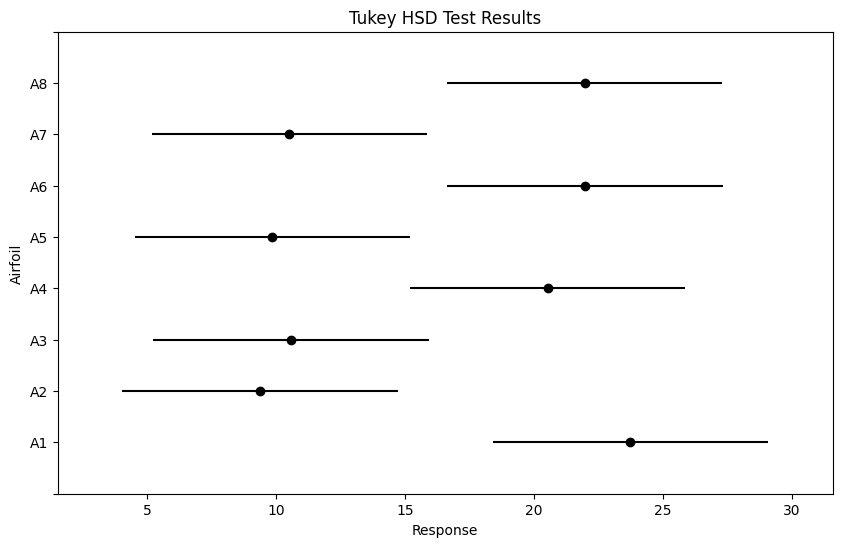

In [44]:
tukey_results = pairwise_tukeyhsd(design['LD'], design['Airfoil'])
print(tukey_results)
fig, ax = plt.subplots(figsize=(8, 6))

# Compute the y-tick positions for the bar chart
ax.set_yticklabels(np.unique(design['Airfoil']))

# Plot the bar chart
tukey_results.plot_simultaneous(ax=ax)

# Add labels and title
ax.set_xlabel('Response')
ax.axvline(x=0.0)
ax.set_ylabel('Airfoil')
ax.set_title('Tukey HSD Test Results')
plt.show()